In [8]:
import os, sys
import pickle
import numpy as np
from split_data import generate_split_data
import pyximport
pyximport.install(setup_args={"include_dirs":np.get_include()},
                  reload_support=True)
os.chdir('/Users/dananjayaliyanage/git/observables/vah_design/emulation')
sys.path.append('/Users/dananjayaliyanage/git/surmise/')

In [10]:
emu_path =  'VAH_' + 'PCSK' + '_closure_' + '.pkl'
with open(emu_path, 'rb') as file:
    emu_tr = pickle.load(file)    
closure_values = np.load('closure_params_PCSK.npy')
print(closure_values)
x_np = np.arange(0, 110)[:, None]
x_np = x_np.astype('object')

[[13.366  -0.5447  0.8631  0.7807  1.4609  0.149   0.1465  0.1747  0.2695
   0.2981  0.0289  0.1339  0.1489 -0.587   0.9472]]


In [34]:
cal_path = 'VAH_' + 'PCSK' + '_calibrator_PTLMC' + '_closure_' +'.pkl'
with open(cal_path, 'rb') as file:
    cal = pickle.load(file)    

In [35]:
cal.y.shape

(110,)

In [44]:
cal.info['yvar'].shape

(110,)

In [13]:
closure_values.shape

(1, 15)

In [14]:
prediction = emu_tr.predict(x=x_np, theta=closure_values)

In [17]:
prediction.mean().shape

(110, 1)

In [38]:
prediction.var().shape

(110, 1)

Designs that have more that 5 failure event rate 
 [ 13.  14.  19.  23.  27.  31.  32.  43.  59.  71.  75.  91.  92.  93.
  98. 123. 127. 129. 131. 142. 143. 146. 156. 160. 162. 168. 169. 170.
 171. 174. 184. 186. 187. 190. 194. 195. 196. 198. 210. 217. 233. 236.
 239. 243. 245. 248. 249. 260. 262. 266. 269. 277. 282. 283. 286. 291.
 293. 299.]
Designs that have more that 5 failure event rate 
 [ 4.  6. 10. 27. 29. 35. 38. 39. 43. 44. 63. 65. 70. 73. 76. 84. 85. 87.
 88.]
Designs that have more that 5 failure event rate 
 [10. 17. 18. 22. 27. 35. 41. 49. 58. 82. 88.]
Designs that have more that 5 failure event rate 
 [ 0.  3.  6. 16. 18. 20. 22. 26. 33. 35. 37. 41. 42. 48. 52. 68. 71. 82.
 83. 88.]
Designs that have more that 5 failure event rate 
 [ 3.  4. 14. 17. 30. 31. 38. 47. 60. 62. 64. 66. 69. 72.]
(449, 123)
(449, 123)
(449, 15)
(70, 123)
(70, 123)
(70, 15)


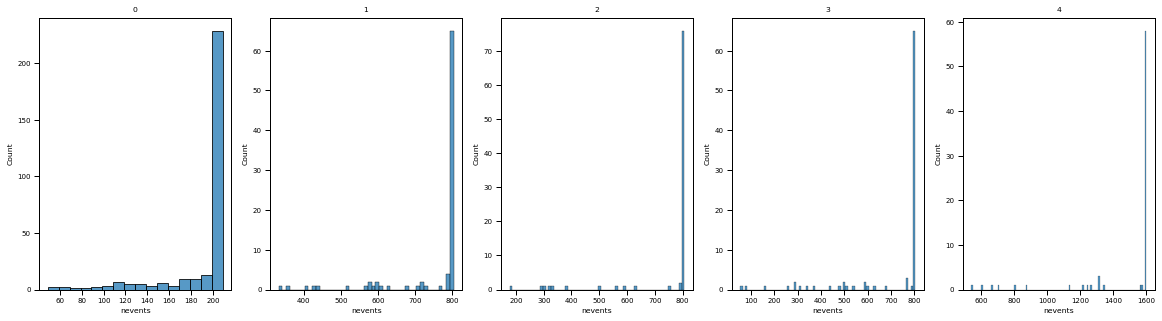

In [18]:
f_train, f_test, theta_train, theta_test, sd_train, sd_test, y, thetanames = generate_split_data()


In [22]:
from plotting import *

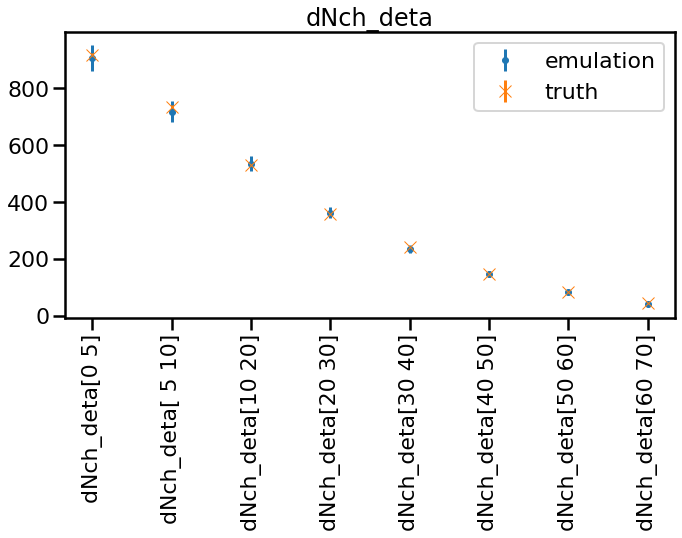

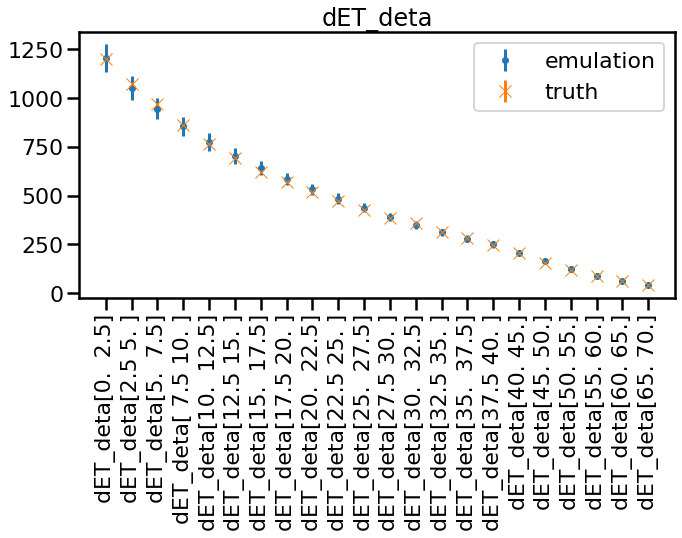

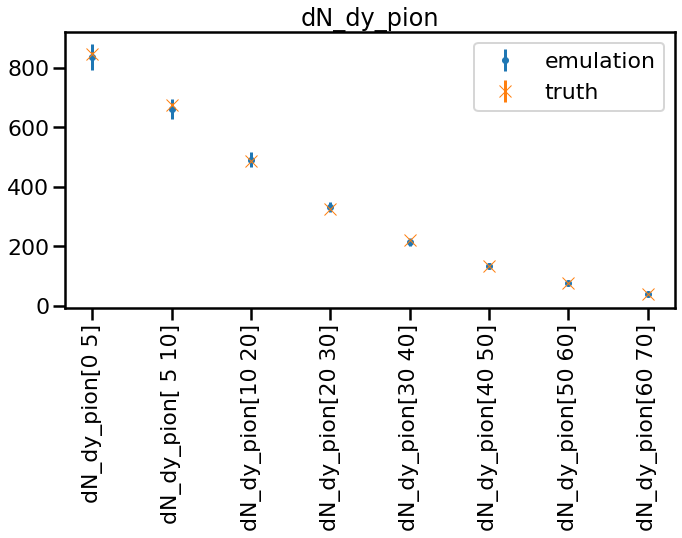

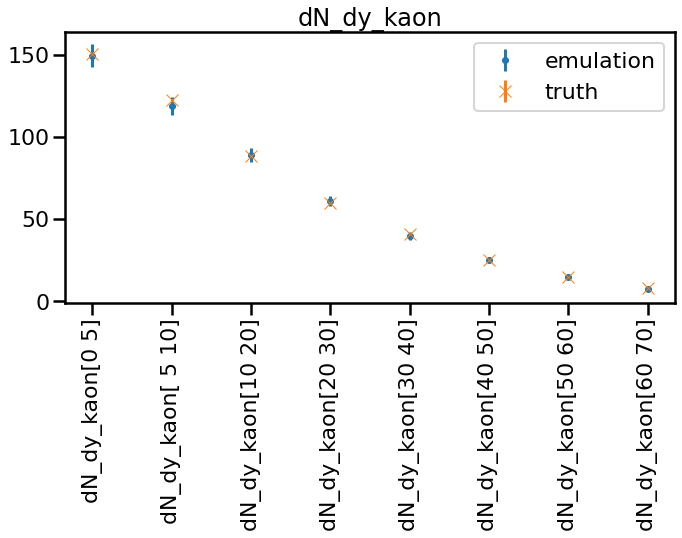

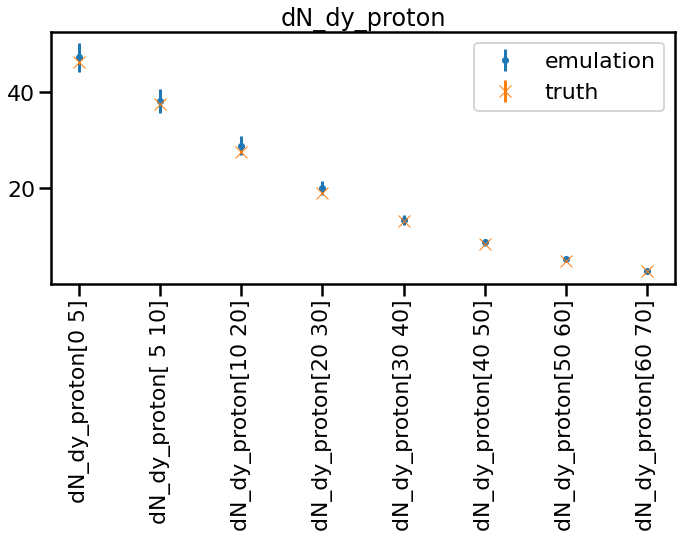

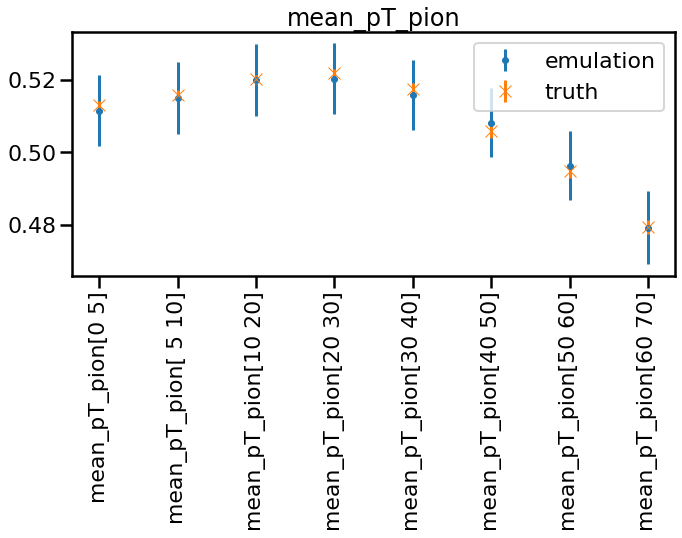

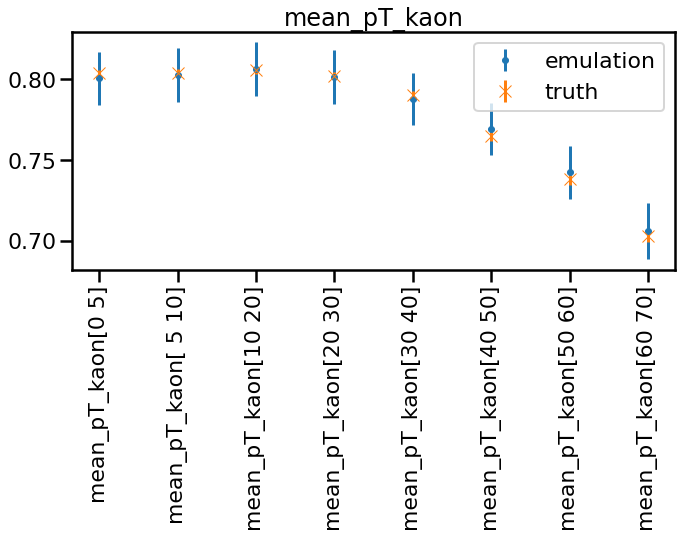

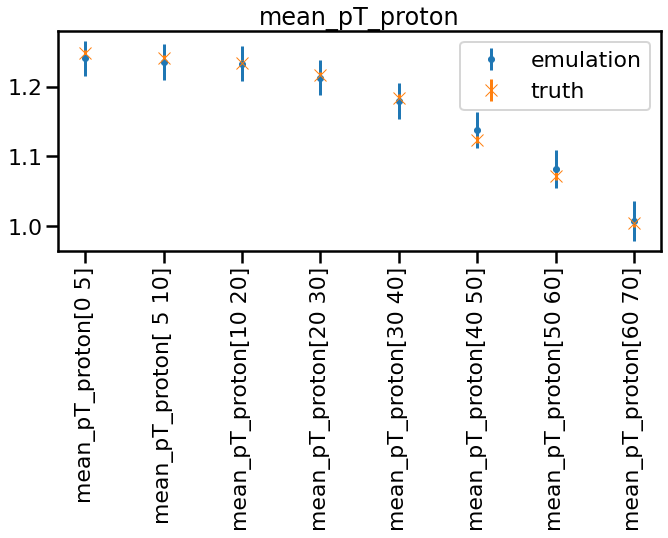

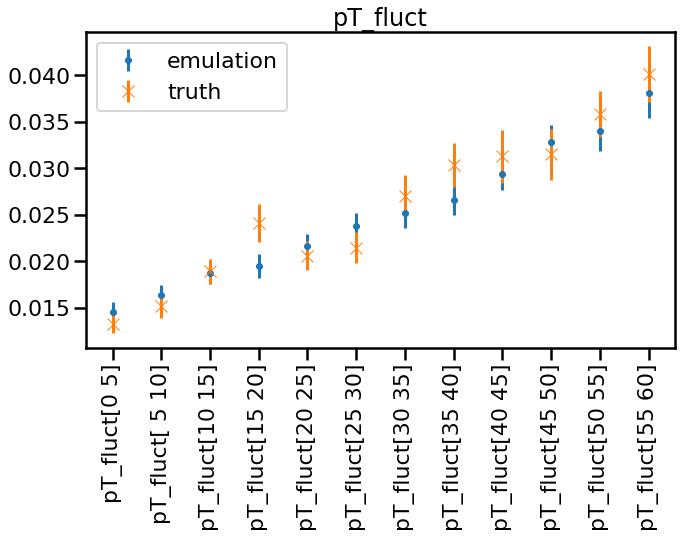

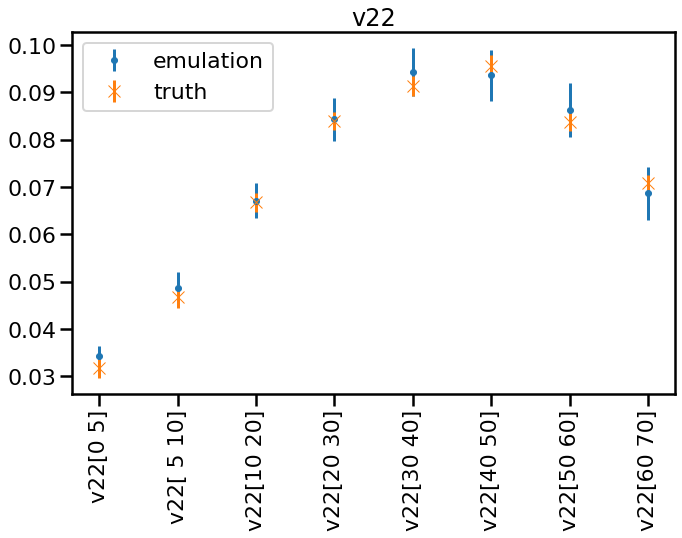

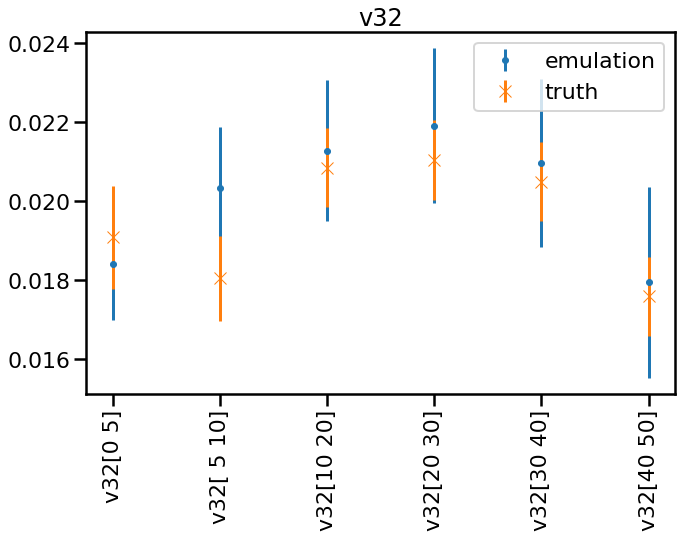

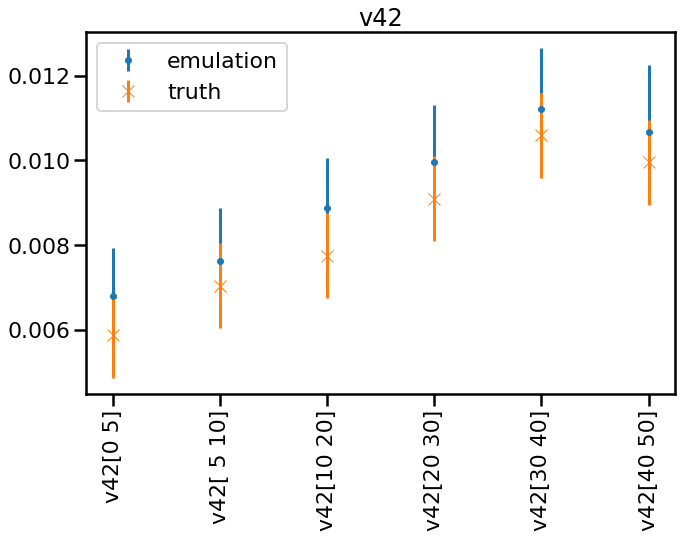

In [63]:
import seaborn as sns
sns.set_context('poster')
for obs_group in  obs_groups.keys():
    for obs in obs_groups[obs_group]:
        #print(obs)
        #print(index[obs])
        fig, ax = plt.subplots(figsize=(10,8))
        tick_label = y.keys()[index[obs][0]: index[obs][1]]

        x = np.arange(0,len(tick_label))
        #print(x)
        #print(tick_label)
        y_emu = prediction.mean()[index[obs][0]: index[obs][1],:].flatten()
        y_emu_er = np.sqrt(prediction.var()[index[obs][0]: index[obs][1],:].flatten())
        y_sim = cal.y[index[obs][0]: index[obs][1]]
        y_sim_er = np.sqrt(cal.info['yvar'][index[obs][0]: index[obs][1]])
        ax.set_title(obs)
        ax.errorbar(x, y_emu,y_emu_er, label='emulation', fmt='.')
        ax.errorbar(x, y_sim,y_sim_er, label='truth', fmt='x')
        ax.set_xticks(x)
        ax.set_xticklabels(tick_label, rotation=90)
        ax.legend()
        plt.tight_layout()
        plt.show()


In [21]:
names = y.keys()

Index(['dNch_deta[0 5]', 'dNch_deta[ 5 10]', 'dNch_deta[10 20]',
       'dNch_deta[20 30]', 'dNch_deta[30 40]', 'dNch_deta[40 50]',
       'dNch_deta[50 60]', 'dNch_deta[60 70]', 'dET_deta[0.  2.5]',
       'dET_deta[2.5 5. ]',
       ...
       'v32[10 20]', 'v32[20 30]', 'v32[30 40]', 'v32[40 50]', 'v42[0 5]',
       'v42[ 5 10]', 'v42[10 20]', 'v42[20 30]', 'v42[30 40]', 'v42[40 50]'],
      dtype='object', length=110)